Type I error, rejects a true null hypothis (false positive)

Type II error, not rejecting a false null hypothisis (false negative)

$$ \beta( T_{\alpha} ; \mu_1 )
    = P( d(X) \leq  c_{\alpha} ;  \mu = \mu_1 )
$$

$$ 1 - \beta
    = P( d(X) >  c_{\alpha} ;  \mu = \mu_1 )
$$


$$ 
\text{Power} = 1 - \beta
= P( \vert t \vert > t^{1- \alpha/2}_{n-1} )
$$

The t statistic I care about is the two sample difference in means test

$$ t = \frac{ \bar x_0 - \bar x_1}{s \sqrt{1/n_0 + 1/n_1}} $$
$$ s^2 = \frac{1}{n-2} \left(  \sum_{i \in n_0} (x_i - \bar x_0)^2 + \sum_{i \in n_1} (x_i - \bar x_1)^2  
\right) 
$$

In [2]:
# https://machinelearningmastery.com/statistical-power-and-power-analysis-in-python/
from statsmodels.stats.power import TTestIndPower

### Calculate the number of samples required

Given:
- the effect size (difference between two means) you're interested in detecting 
    - "standardized effect size, difference between the two means divided by the standard deviation. effect_size has to be positive."
- the significance level you will accept
    - "the probability of a type I error, that is wrong rejections if the Null Hypothesis is true" 
- the power you want
    - "Power is the probability that the test correctly rejects the Null Hypothesis if the Alternative Hypothesis is true"


https://www.statsmodels.org/dev/generated/statsmodels.stats.power.TTestIndPower.power.html#statsmodels.stats.power.TTestIndPower.power

In [5]:
effect = 1 #standardized effect size, 1 standard deviation differnce
alpha = .05
power = .9

In [6]:
analysis = TTestIndPower()
result = analysis.solve_power(effect, power=power, nobs1=None, ratio=1.0, alpha=alpha)
print('Sample Size: %.3f' % result)

Sample Size: 22.021


In [11]:
effect = .5 #standardized effect size, 1/2 standard deviation differnce
result = analysis.solve_power(effect, power=power, nobs1=None, ratio=1.0, alpha=alpha)
print('Sample Size: %.3f' % result)

Sample Size: 85.031


### Recreate the Power Function chart 4.2

In [12]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np

In [65]:
ef = np.linspace(-2,2, num =41)
obs1 = 18
ratio = .33
a = .05

In [66]:
power = np.array([ 
            analysis.power(effect_size = abs(e), nobs1 = obs1, alpha = a, ratio = ratio   ) 
            for e in ef
            ])

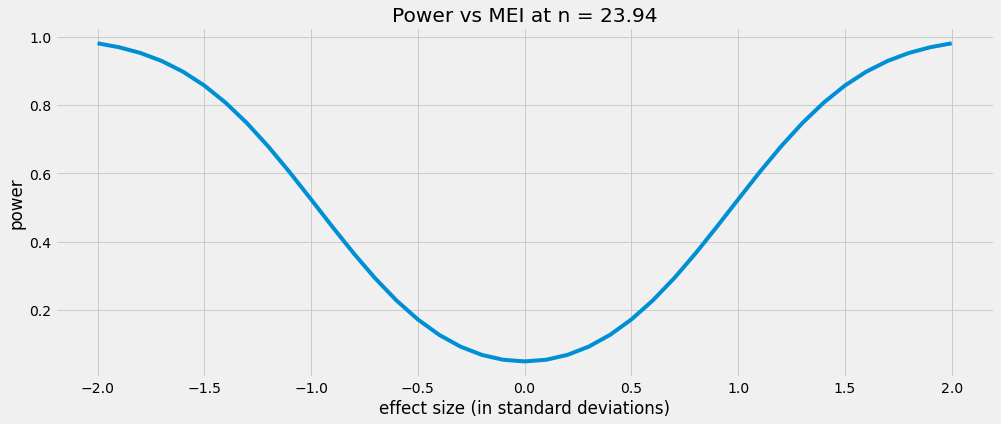

In [67]:
fig, ax1 = plt.subplots(figsize=(15, 6))
ax1.plot(ef, power)
ax1.set_title("Power vs MEI at n = {}".format(obs1+obs1*ratio))
ax1.set_xlabel("effect size (in standard deviations)")
ax1.set_ylabel("power")
plt.show()

### Interpretation and Intuition

??

# Digression into F-distribution interpretation of power

\begin{align*} 
    \text{Power} 
        &= 1 - \beta \\
        &= P( \vert t \vert > t^{1-\alpha}_{df} ) \\
        &= P \left( t^2 > (t^{1-\alpha}_{df})^2 \right) \\
        &= P \left(  
            \left( \frac{ \bar x_0 - \bar x_1} { s \sqrt{1/n_0 + 1/n_1}
            } \right)^2
            > F^{1-\alpha}_{1,df}
            \right) \\
        &= P \left(
                \frac{ (\bar x_0 - \bar x_1 )^2}
{  s^2 \left( 1/n_0 + 1/n_1 \right) } 
            > F^{1-\alpha}_{1,df}
            \right) \\ 
        &= P \left(
                \frac{ (\frac{n_1+n_0}{n_0n_1}) (\bar x_0 - \bar x_1 )^2}{ s^2 } 
            > F^{1-\alpha}_{1,df}
            \right) \\ 
        &= P \left( \frac{  1/\sigma^2 (\sqrt{\frac{n_1+n_0}{n_0n_1}}(\bar x_0 - \bar x_1 ))^2}{ s^2 / \sigma^2 } 
            > F^{1-\alpha}_{1,df} \right) \\
        &= P \left(
                \frac{ 
                    \left(  
                        \frac{\sqrt{\frac{n_1+n_0}{n_0n_1}}(\bar x_0 - \bar x_1 )}{\sigma}
                    \right)^2
                    }{s^2 / \sigma^2}
            > F^{1-\alpha}_{1,df} \right) \\
        &= P \left(
                \frac{ 
                    \left(  
                        \frac{\sqrt{\frac{n_1+n_0}{n_0n_1}}(\bar x_0 - \bar x_1 )}{\sigma}
                    \right)^2
                    }{s^2 / \sigma^2}
            > F^{1-\alpha}_{1,df} \right) \\
\end{align*}

\begin{align*}
&= P \left(  
            \left( \frac{ \bar x_0 - \bar x_1} { \sqrt{ \frac{1}{n-2} \left(  \sum_{i \in n_0} (x_i - \bar x_0)^2 + \sum_{i \in n_1} (x_i- \bar x_1)^2  \right) } \sqrt{1/n_0 + 1/n_1}
            } \right)^2
            > F^{1-\alpha}_{1,df}
            \right) \\
        &= P \left(
                \frac{ (\bar x_0 - \bar x_1 )^2}
{ \left( \frac{1}{n-2} ( \sum_{i \in n_0} (x_i - \bar x_0)^2 + \sum_{i \in n_1} (x_i- \bar x_1)^2 ) \right) \cdot \left( 1/n_0 + 1/n_1 \right) } 
            > F^{1-\alpha}_{1,df}
            \right) \\ 
        &= P \left(
                \frac{ (\frac{n_1+n_0}{n_0n_1}) (\bar x_0 - \bar x_1 )^2}{ s^2 } 
            > F^{1-\alpha}_{1,df}
            \right) \\ 
        &= P \left( \frac{  1/\sigma^2 (\sqrt{\frac{n_1+n_0}{n_0n_1}}(\bar x_0 - \bar x_1 ))^2}{ s^2 / \sigma^2 } 
            > F^{1-\alpha}_{1,df} \right) \\
        &= P \left(
                \frac{ 
                    \left(  
                        \frac{\sqrt{\frac{n_1+n_0}{n_0n_1}}(\bar x_0 - \bar x_1 )}{\sigma}
                    \right)^2
                    }{s^2 / \sigma^2}
            > F^{1-\alpha}_{1,df} \right) \\
\end{align*}